# **Лабораторная работа №3. Визуализация данных с использованием библиотек Python. Seaborn.**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/bfeed.csv')

In [ ]:
data.head(5)

,Unnamed: 0,duration,delta,race,poverty,smoke,alcohol,agemth,ybirth,yschool,pc3mth
0,1,16,1,1,0,0,1,24,82,14,0
1,2,1,1,1,0,1,0,26,85,12,0
2,3,4,0,1,0,0,0,25,85,12,0
3,4,3,1,1,0,1,1,21,85,9,0
4,5,36,1,1,0,1,0,22,82,12,0


**Описание данных**

* **duration** - Продолжительность грудного вскармливания (нед.). *Количественная*.

* **delta** - Индикатор завершения грудного вскармливания (1=да, 0=нет). *Категориальный*

* **race** - Раса матери (1=белая, 2=черная, 3=другая). *Категориальный*

* **poverty** - Мать в бедности (1=да, 0=нет). *Категориальный*

* **smoke** - Мать курила при рождении ребенка (1=да, 0=нет). *Категориальный*

* **alcohol** - Мать употребляла алкоголь при рождении ребенка (1=да, 0=нет). *Категориальный*

* **agemth** - Возраст матери при рождении ребенка. *Количественный*

* **ybirth** - Год рождения ребенка. *Количественный*

* **yschool** - Уровень образования матери (годы обучения). *Количественный*

* **pc3mth** - Дородовой уход после 3-го месяца (1=да, 0=нет). *Категориальный*

**Распределения количественных признаков**

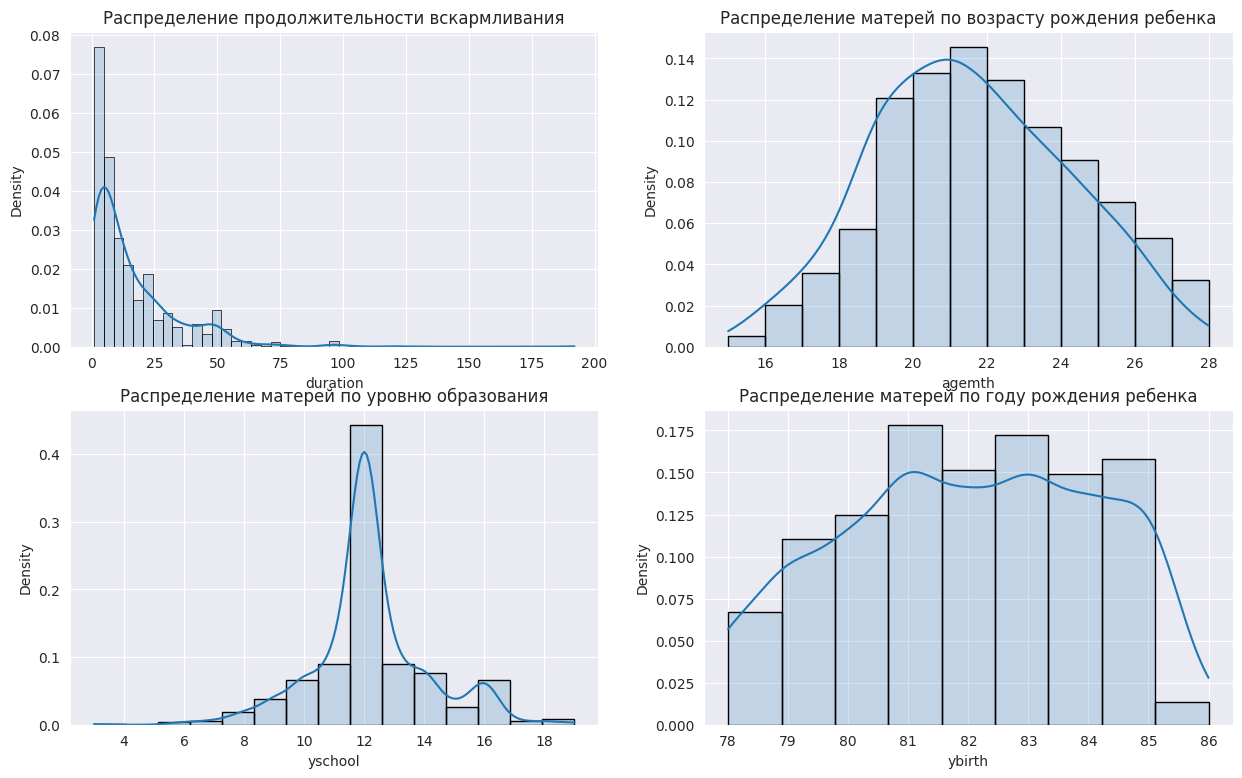

In [ ]:
sns.set_style("darkgrid")
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(15, 9))

sns.histplot(data=data['duration'], alpha = 0.2, edgecolor='k',
         linewidth=0.5,bins=len(pd.unique(data['duration'])),kde=True,stat="density", ax=axs[0,0])
axs[0,0].set_title('Распределение продолжительности вскармливания')

sns.histplot(data=data['agemth'],alpha = 0.2, edgecolor='k',
         linewidth=1,bins=(len(pd.unique(data['agemth']))-1),kde=True,stat="density", ax=axs[0,1])
axs[0,1].set_title('Распределение матерей по возрасту рождения ребенка')

sns.histplot(data=data['yschool'],alpha = 0.2, edgecolor='k',
         linewidth=1,bins=len(pd.unique(data['yschool'])),kde=True,stat="density", ax=axs[1,0])
axs[1,0].set_title('Распределение матерей по уровню образования')

sns.histplot(data=data['ybirth'],alpha = 0.2, edgecolor='k',
         linewidth=1,bins=len(pd.unique(data['ybirth'])),kde=True,stat="density", ax=axs[1,1])
axs[1,1].set_title('Распределение матерей по году рождения ребенка')

plt.show()

**Визуализация категориальных признаков**

Catplot, boxplot, scatterplot, stripplot, swarmplot, barplot, countplot, jointplot.

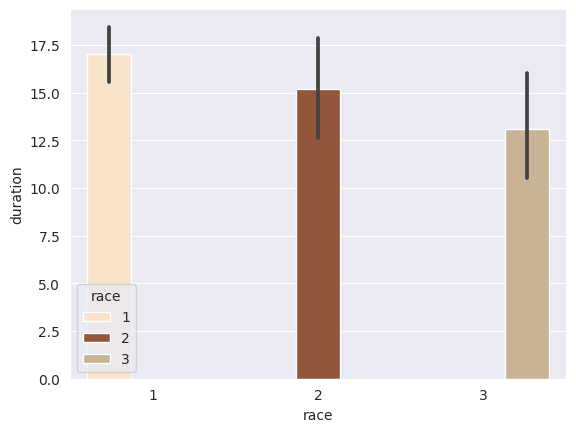

In [ ]:
colors = ['bisque','sienna','tan']
sns.barplot(x='race', y='duration', hue='race', data=data, palette=colors)
plt.show()

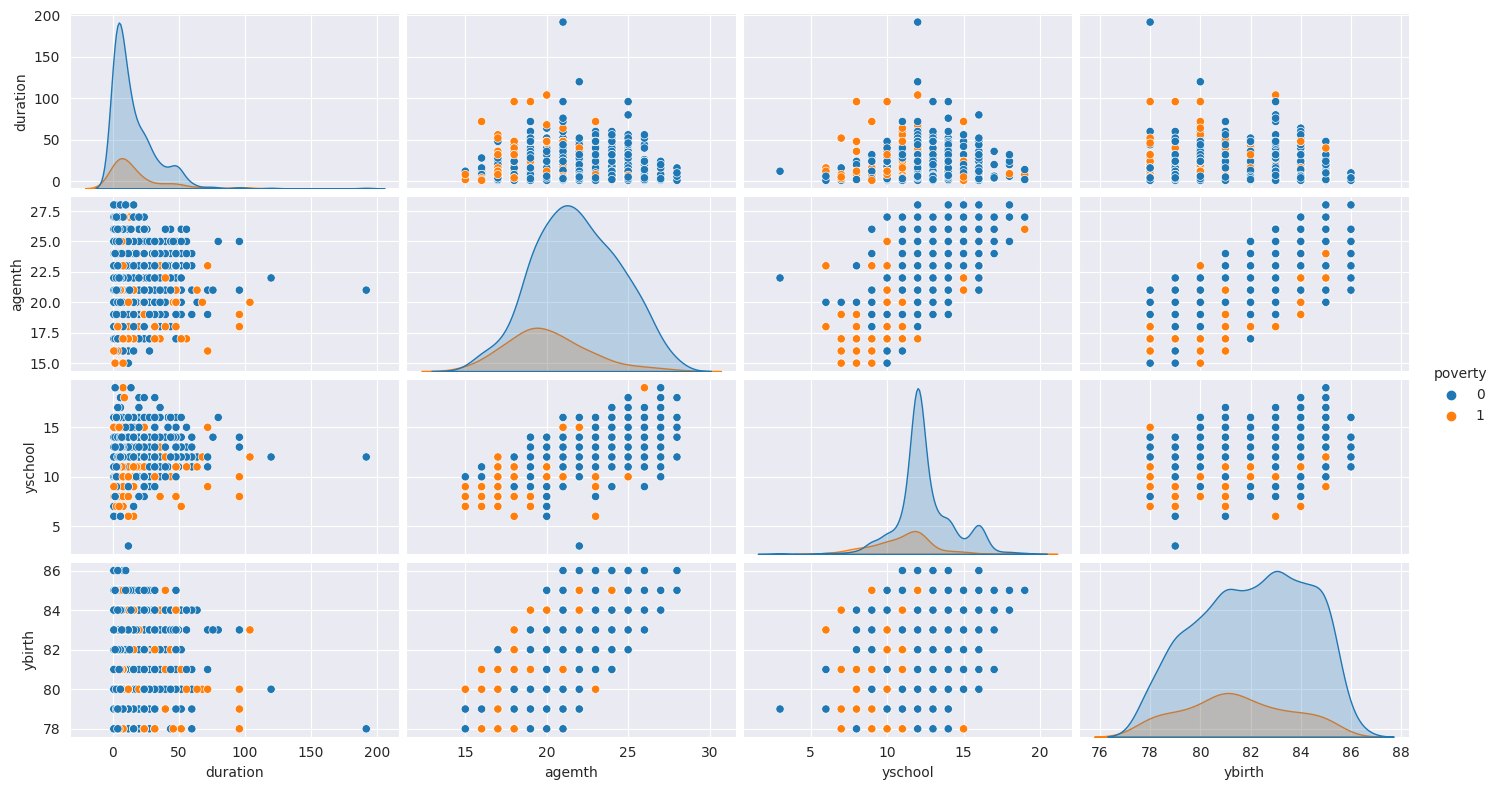

In [ ]:
num_pair = data[['duration','agemth','yschool','ybirth','poverty']]

sns.pairplot(num_pair,hue="poverty",height=2, aspect=1.8)
plt.show()

Наблюдаем уже замеченную ранее взаимосвязь малообеспеченности матери с ее возрастом рождения ребенка и уровнем образования.

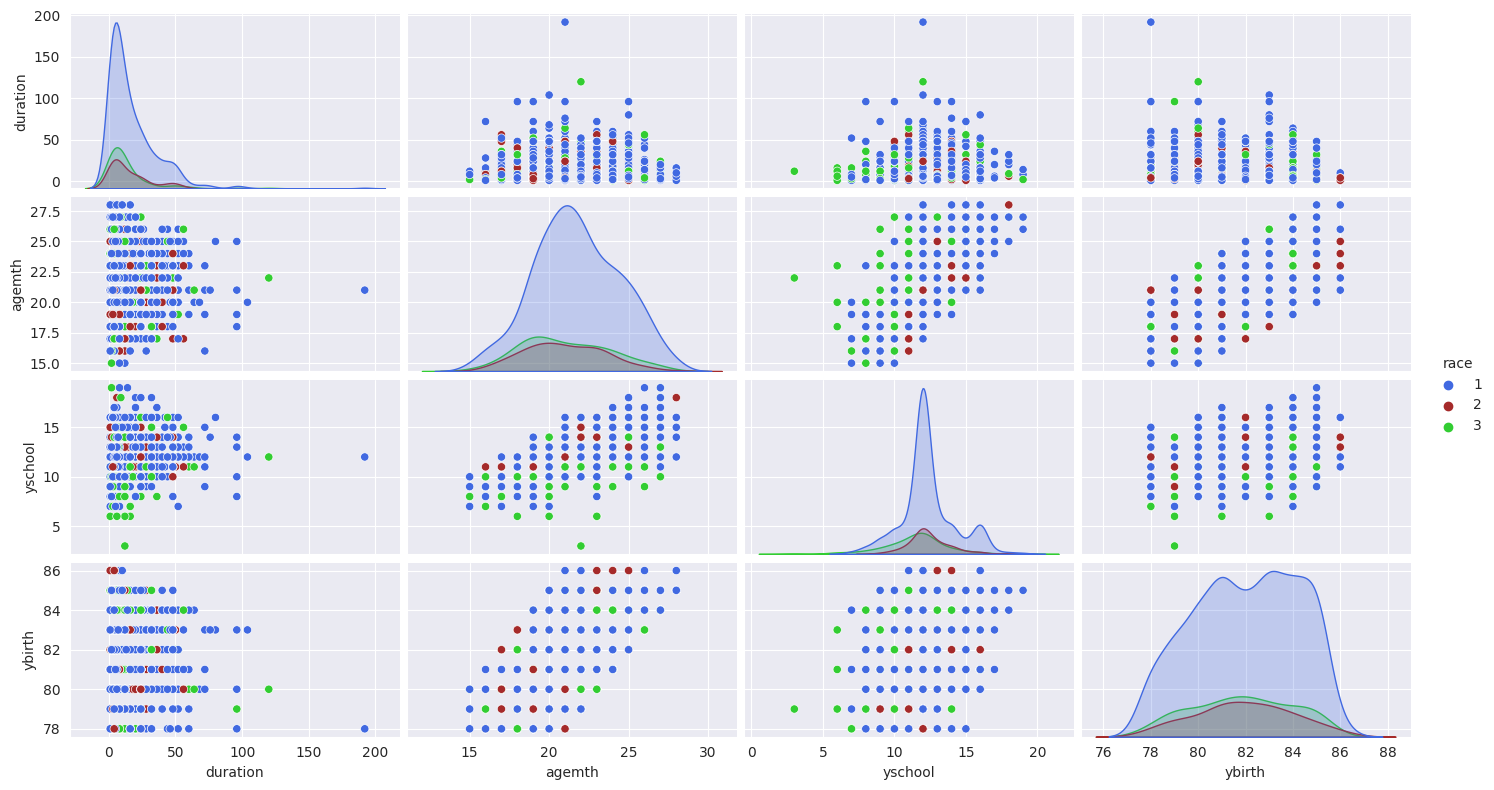

In [ ]:
num_pair = data[['duration','agemth','yschool','ybirth','race']]

sns.pairplot(num_pair,diag_kind="kde",hue="race",palette=['royalblue','brown','limegreen'],height=2, aspect=1.8)
plt.show()

Здесь заметим, что матери с расой "Another" имеют наихудший уровень образования.

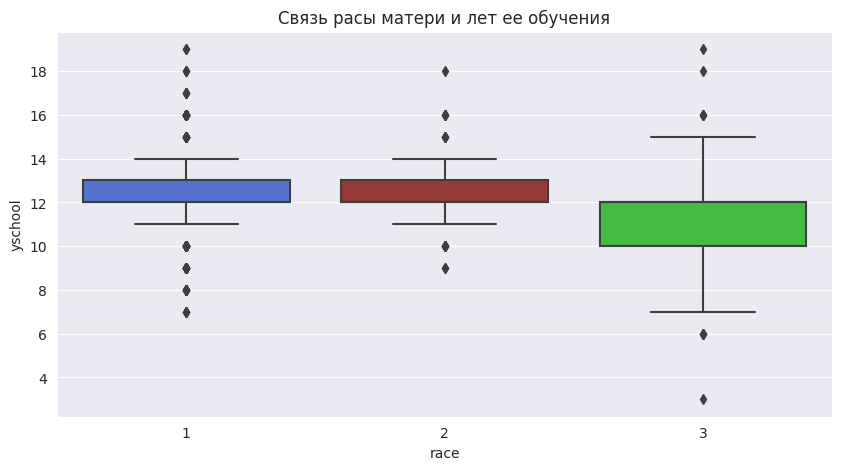

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(x=data['race'], y=data['yschool'], ax=ax,palette=['royalblue','brown','limegreen'])
plt.title('Связь расы матери и лет ее обучения')
plt.show()

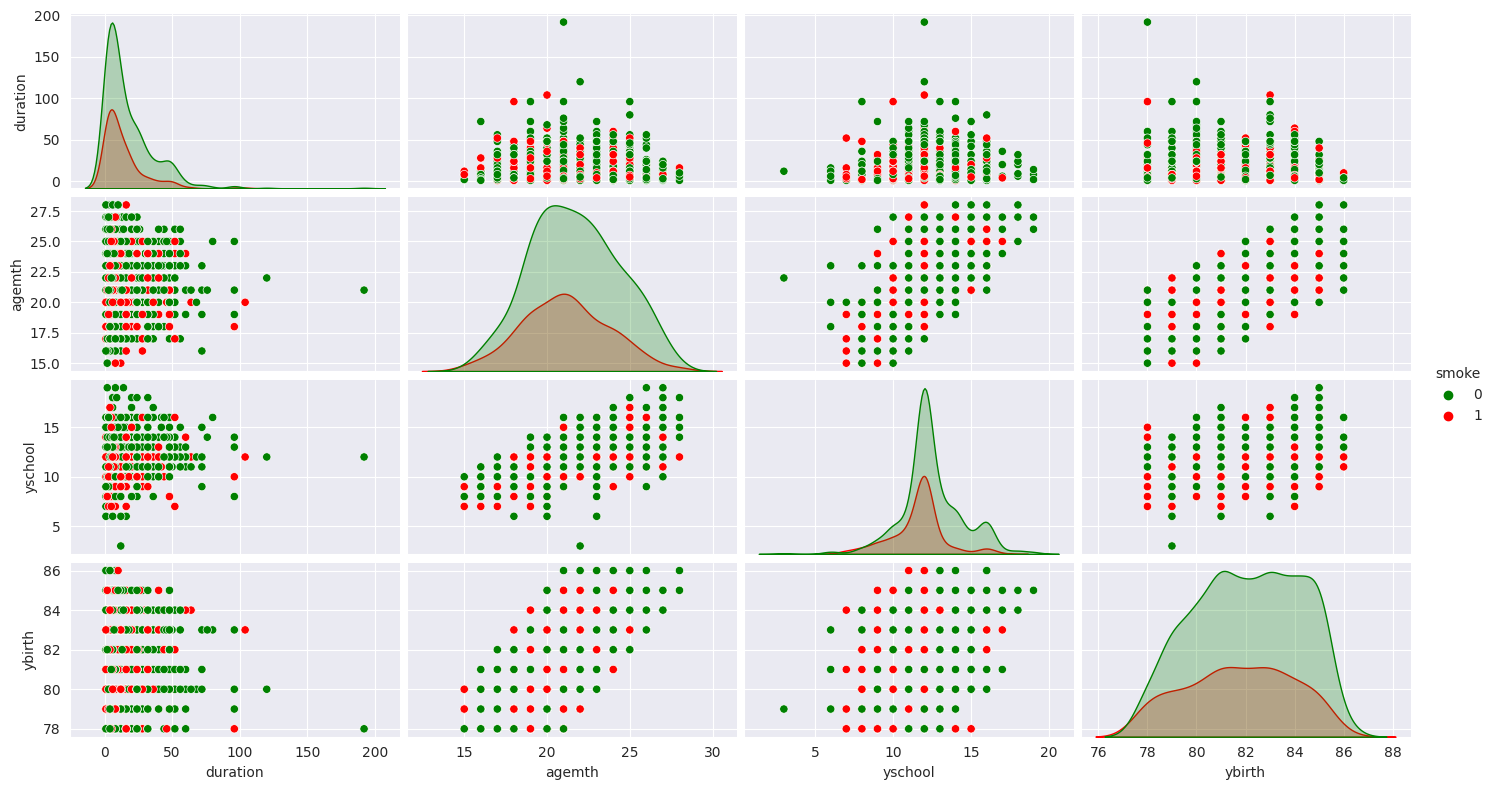

In [ ]:
num_pair = data[['duration','agemth','yschool','ybirth','smoke']]

sns.pairplot(num_pair,diag_kind="kde",hue="smoke", palette=['green','red'],height=2, aspect=1.8)
plt.show()

Также можем предположить, что матери с низким уровнем образованности чаще курят.

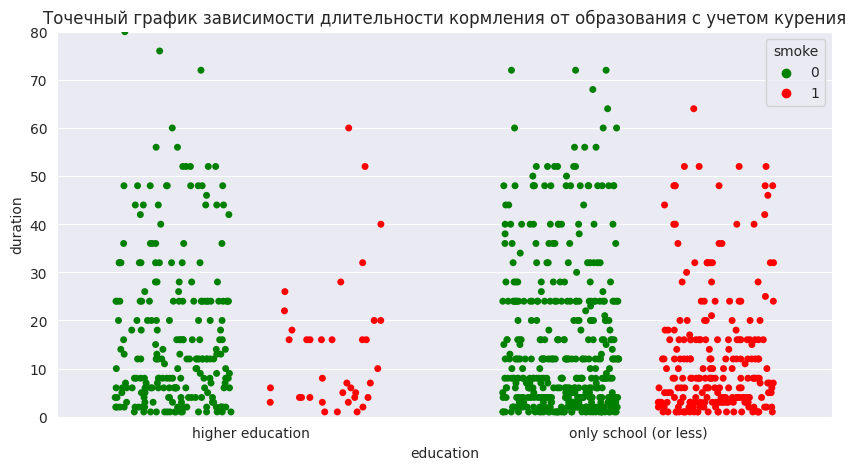

In [ ]:
smokedf = pd.DataFrame(data[['smoke','yschool','duration']])
smokedf['education']=smokedf['yschool'].map(lambda x: 'only school (or less)' if x < 13 else 'higher education')
fig, ax = plt.subplots(figsize=(10, 5))
sns.stripplot(x='education', y='duration', data=smokedf, hue='smoke',dodge=True, ax=ax, jitter=0.3,palette=['green','red'])
plt.ylim(0,80)
plt.title('Точечный график зависимости длительности кормления от образования с учетом курения')
plt.show()

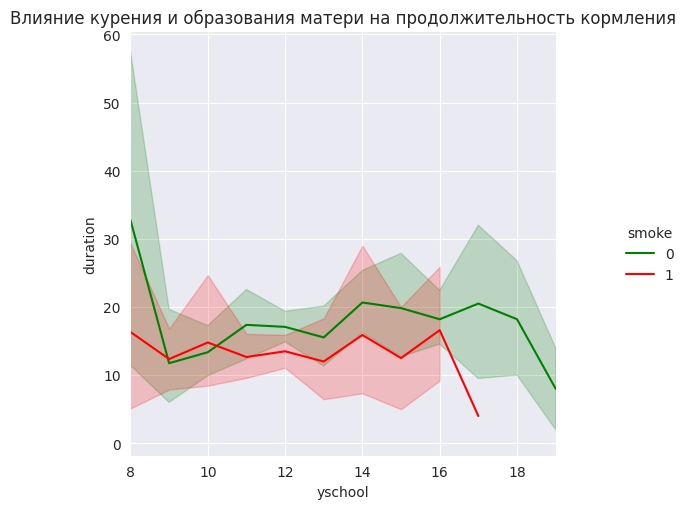

In [ ]:
sns.relplot(x='yschool', y='duration', data=data, hue='smoke',kind='line',palette=['green','red'])
plt.title('Влияние курения и образования матери на продолжительность кормления')
plt.xlim(8,19)
plt.show()

Некурящие матери кормят грудью чуть дольше, чем курящие. По этому графику также можем заметить, есть тенденция с сокращению длительности кормление с увеличение лет обучения (следовательно, и возраста). Заметим, что в датасете отсутсвуют записи о курящих матерях с образованием более 17 лет. 

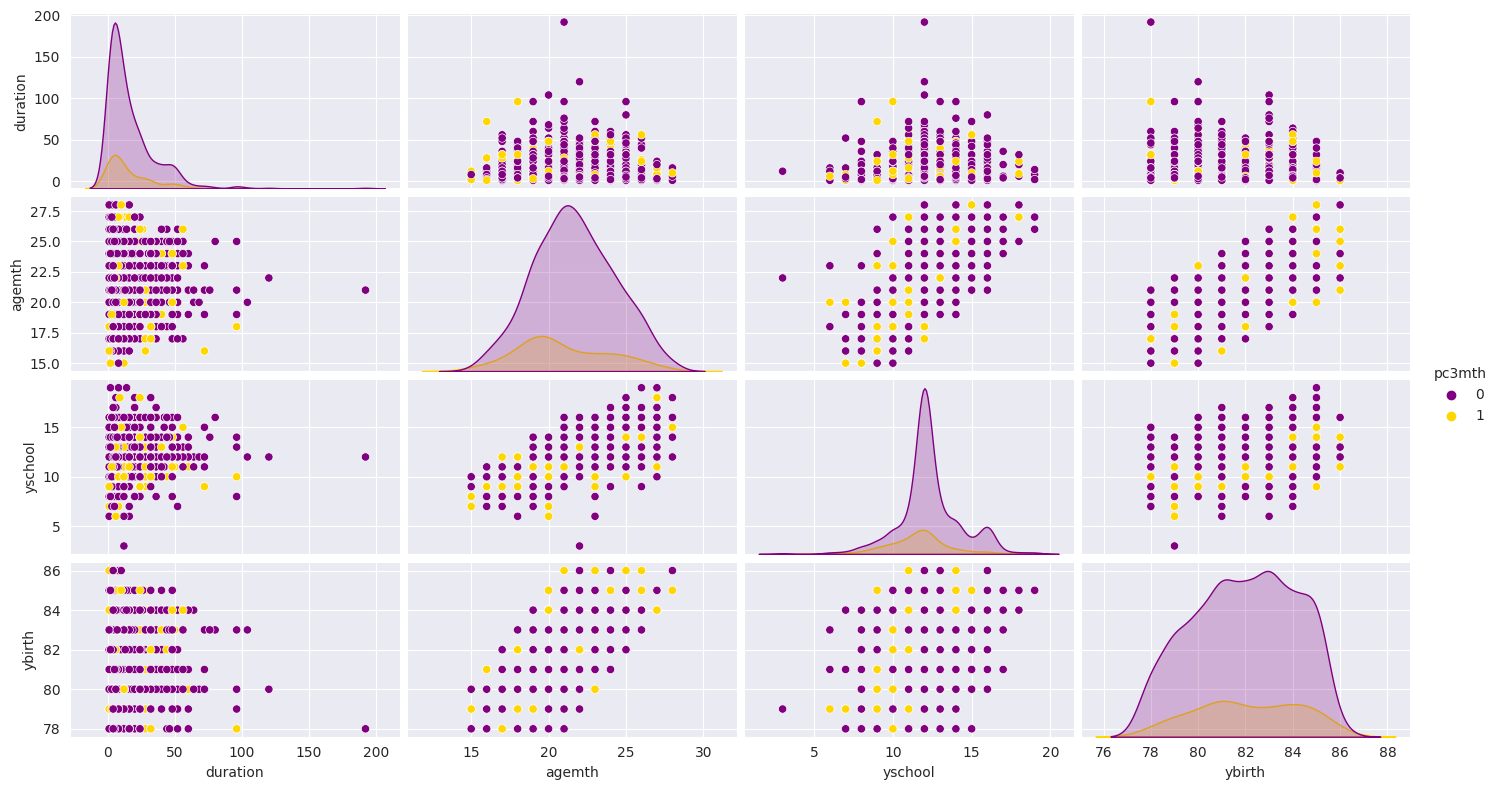

In [ ]:
num_pair = data[['duration','agemth','yschool','ybirth','pc3mth']]

sns.pairplot(num_pair,diag_kind="kde",hue="pc3mth", palette=['purple','gold'],height=2, aspect=1.8)
plt.show()

Вместе с тем, они чаще получают дородовой уход.

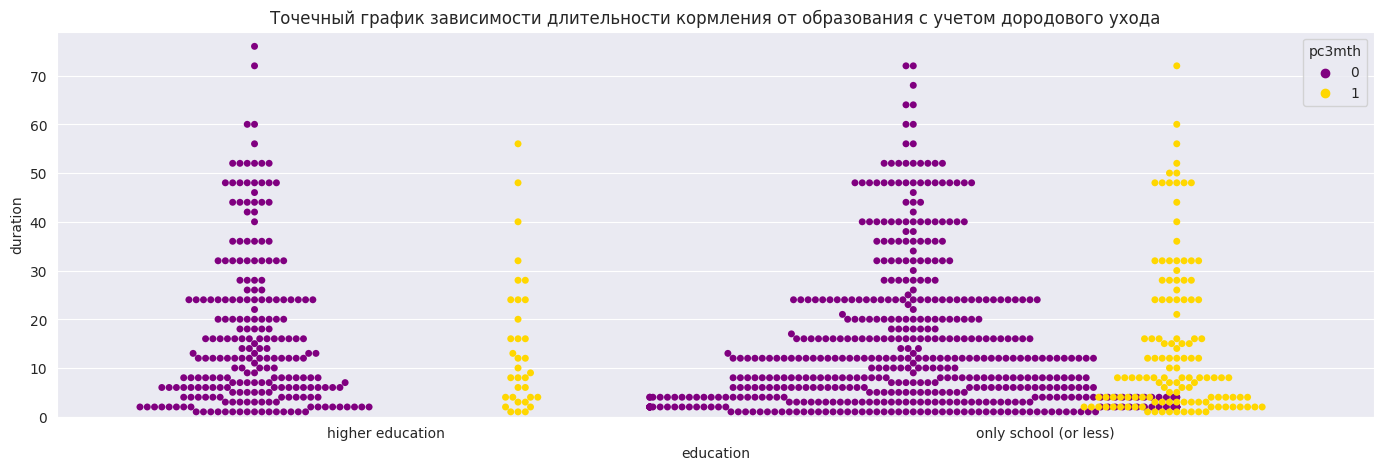

In [ ]:
fig, ax = plt.subplots(figsize=(17, 5))
sns.swarmplot(x='education', y='duration', data=smokedf, hue=data['pc3mth'],dodge=True, ax=ax,palette=['purple','gold'])
plt.ylim(0,79)
plt.title('Точечный график зависимости длительности кормления от образования с учетом дородового ухода')
plt.show()

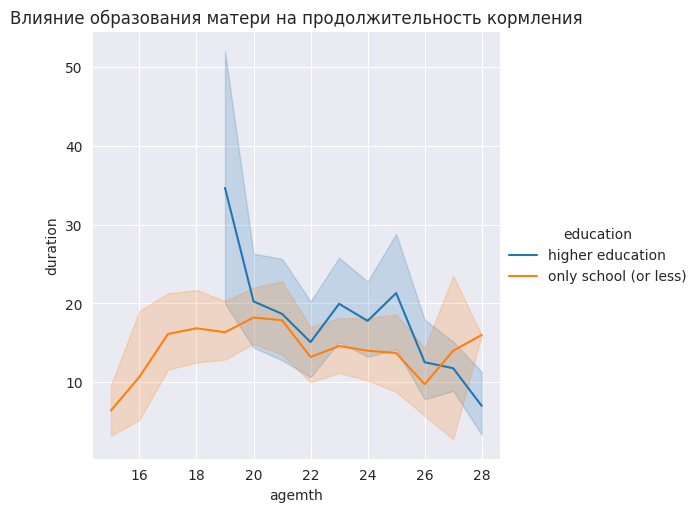

In [ ]:
sns.relplot(x='agemth', y='duration', hue=smokedf['education'], kind='line', data=data)
plt.title('Влияние образования матери на продолжительность кормления')
plt.show()

**Выводы:**
Обнаружена явная зависимость продолжительности вскармливания от расы матери и ее уровня образования. Также обнаружили взаимосвязь обеспеченности матери с ее возрастом рождения ребенка и уровнем образования. Также можем предположить, что матери с низким уровнем образованности чаще курят.

Предполагаем, что выбросов нет.